In [4]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from ppi_py.experiments import run,generate_data
from ppi_py.ppi import debias_pointestimate
import pandas as pd

# Run Experiments

In [ ]:
ns = [100, 300]
ps = [10, 20, 50, 100, 200, 300, 400, 500, 600, 800, 1000]

import pandas as pd

outfile = "results/all_results.csv"

write_header = True 

for sig in [0.01, 0.1, 1.0, 5.0]:
    print(f"Running experiments with sig={sig}")
    for bet in [0.0, 0.5, 1.0]:
        print(f"  with bet={bet}")
        df = run(ns=ns, ps=ps, N=600, num_trials=30, noise=1.0, sig=sig, bet=bet)
        df.to_csv(outfile, mode="a", header=write_header, index=False)
        write_header = False 

In [ ]:
N_total = 1500
ns = [50, 100, 500]
ps = [2, 10, 20, 50, 100, 200, 300, 350, 400, 500, 600, 800, 1000, 1400, 1450, 1500, 2000, 3000]

import pandas as pd

outfile = "results/all_results2.csv"

write_header = True 

for sig in [5.0]:
    print(f"Running experiments with sig={sig}")
    for bet in [0.0, 0.5, 1.0]:
        print(f"  with bet={bet}")
        df = run(ns=ns, ps=ps, N=N_total, num_trials=10, noise=1.0, sig=sig, bet=bet)
        df.to_csv(outfile, mode="a", header=write_header, index=False)
        write_header = False 

### goodness of fit

In [10]:

import numpy as np

n = 100
p = 20
N = 1500
num_trials = 1
noise = 1.0
sig = 1.0
bet = 0.5
ns = [100, 300, 500]

for p in [10, 20, 50, 100, 200, 300, 400, 500, 600, 800, 1000, 1400, 1450, 1500, 2000, 3000]:
    print(f"p={p}")
    _X_total, _Y_total, Yhat_total, theta = generate_data(N, p, noise=noise, beta=bet, sigma=sig)
    for n in ns:
        for trial in range(num_trials):
            idx = np.random.permutation(N)
            X_labeled, X_unlabeled = _X_total[idx[:n]], _X_total[idx[n:]]
            Y_labeled, Y_unlabeled = _Y_total[idx[:n]], _Y_total[idx[n:]]
            Yhat_labeled, Yhat_unlabeled = Yhat_total[idx[:n]], Yhat_total[idx[n:]]

            _, metrics = debias_pointestimate(X_labeled, Y_labeled, Yhat_labeled, X_unlabeled, Yhat_unlabeled)
            print(f"n={n}, trial={trial}, metrics={metrics}")

p=10
n=100, trial=0, metrics={'cv_r2': 0.5024135445732341, 'cv_rmse': 1.1342035237598647, 'cv_mae': 0.8914594230351679, 'null_rmse': 1.6078914178781731, 'null_mae': 1.2734251894359958, 'rmse_relative_gain': 0.2946019170519628, 'mae_relative_gain': 0.29995147698468394, 'n_splits': 5}
n=300, trial=0, metrics={'cv_r2': 0.7074491391084119, 'cv_rmse': 1.0143564268486562, 'cv_mae': 0.8097404569960968, 'null_rmse': 1.8753826548580037, 'null_mae': 1.5016330356580083, 'rmse_relative_gain': 0.45912028981335595, 'mae_relative_gain': 0.4607600939990826, 'n_splits': 5}
n=500, trial=0, metrics={'cv_r2': 0.6909066834171923, 'cv_rmse': 1.0083128351704675, 'cv_mae': 0.8068204227213949, 'null_rmse': 1.8136375052212552, 'null_mae': 1.4479973671371162, 'rmse_relative_gain': 0.444038385693034, 'mae_relative_gain': 0.44280256233021587, 'n_splits': 5}
p=20
n=100, trial=0, metrics={'cv_r2': 0.8224064355304196, 'cv_rmse': 1.2908379216077084, 'cv_mae': 1.0194938246314618, 'null_rmse': 3.0630783337872884, 'null_

KeyboardInterrupt: 

# Plots

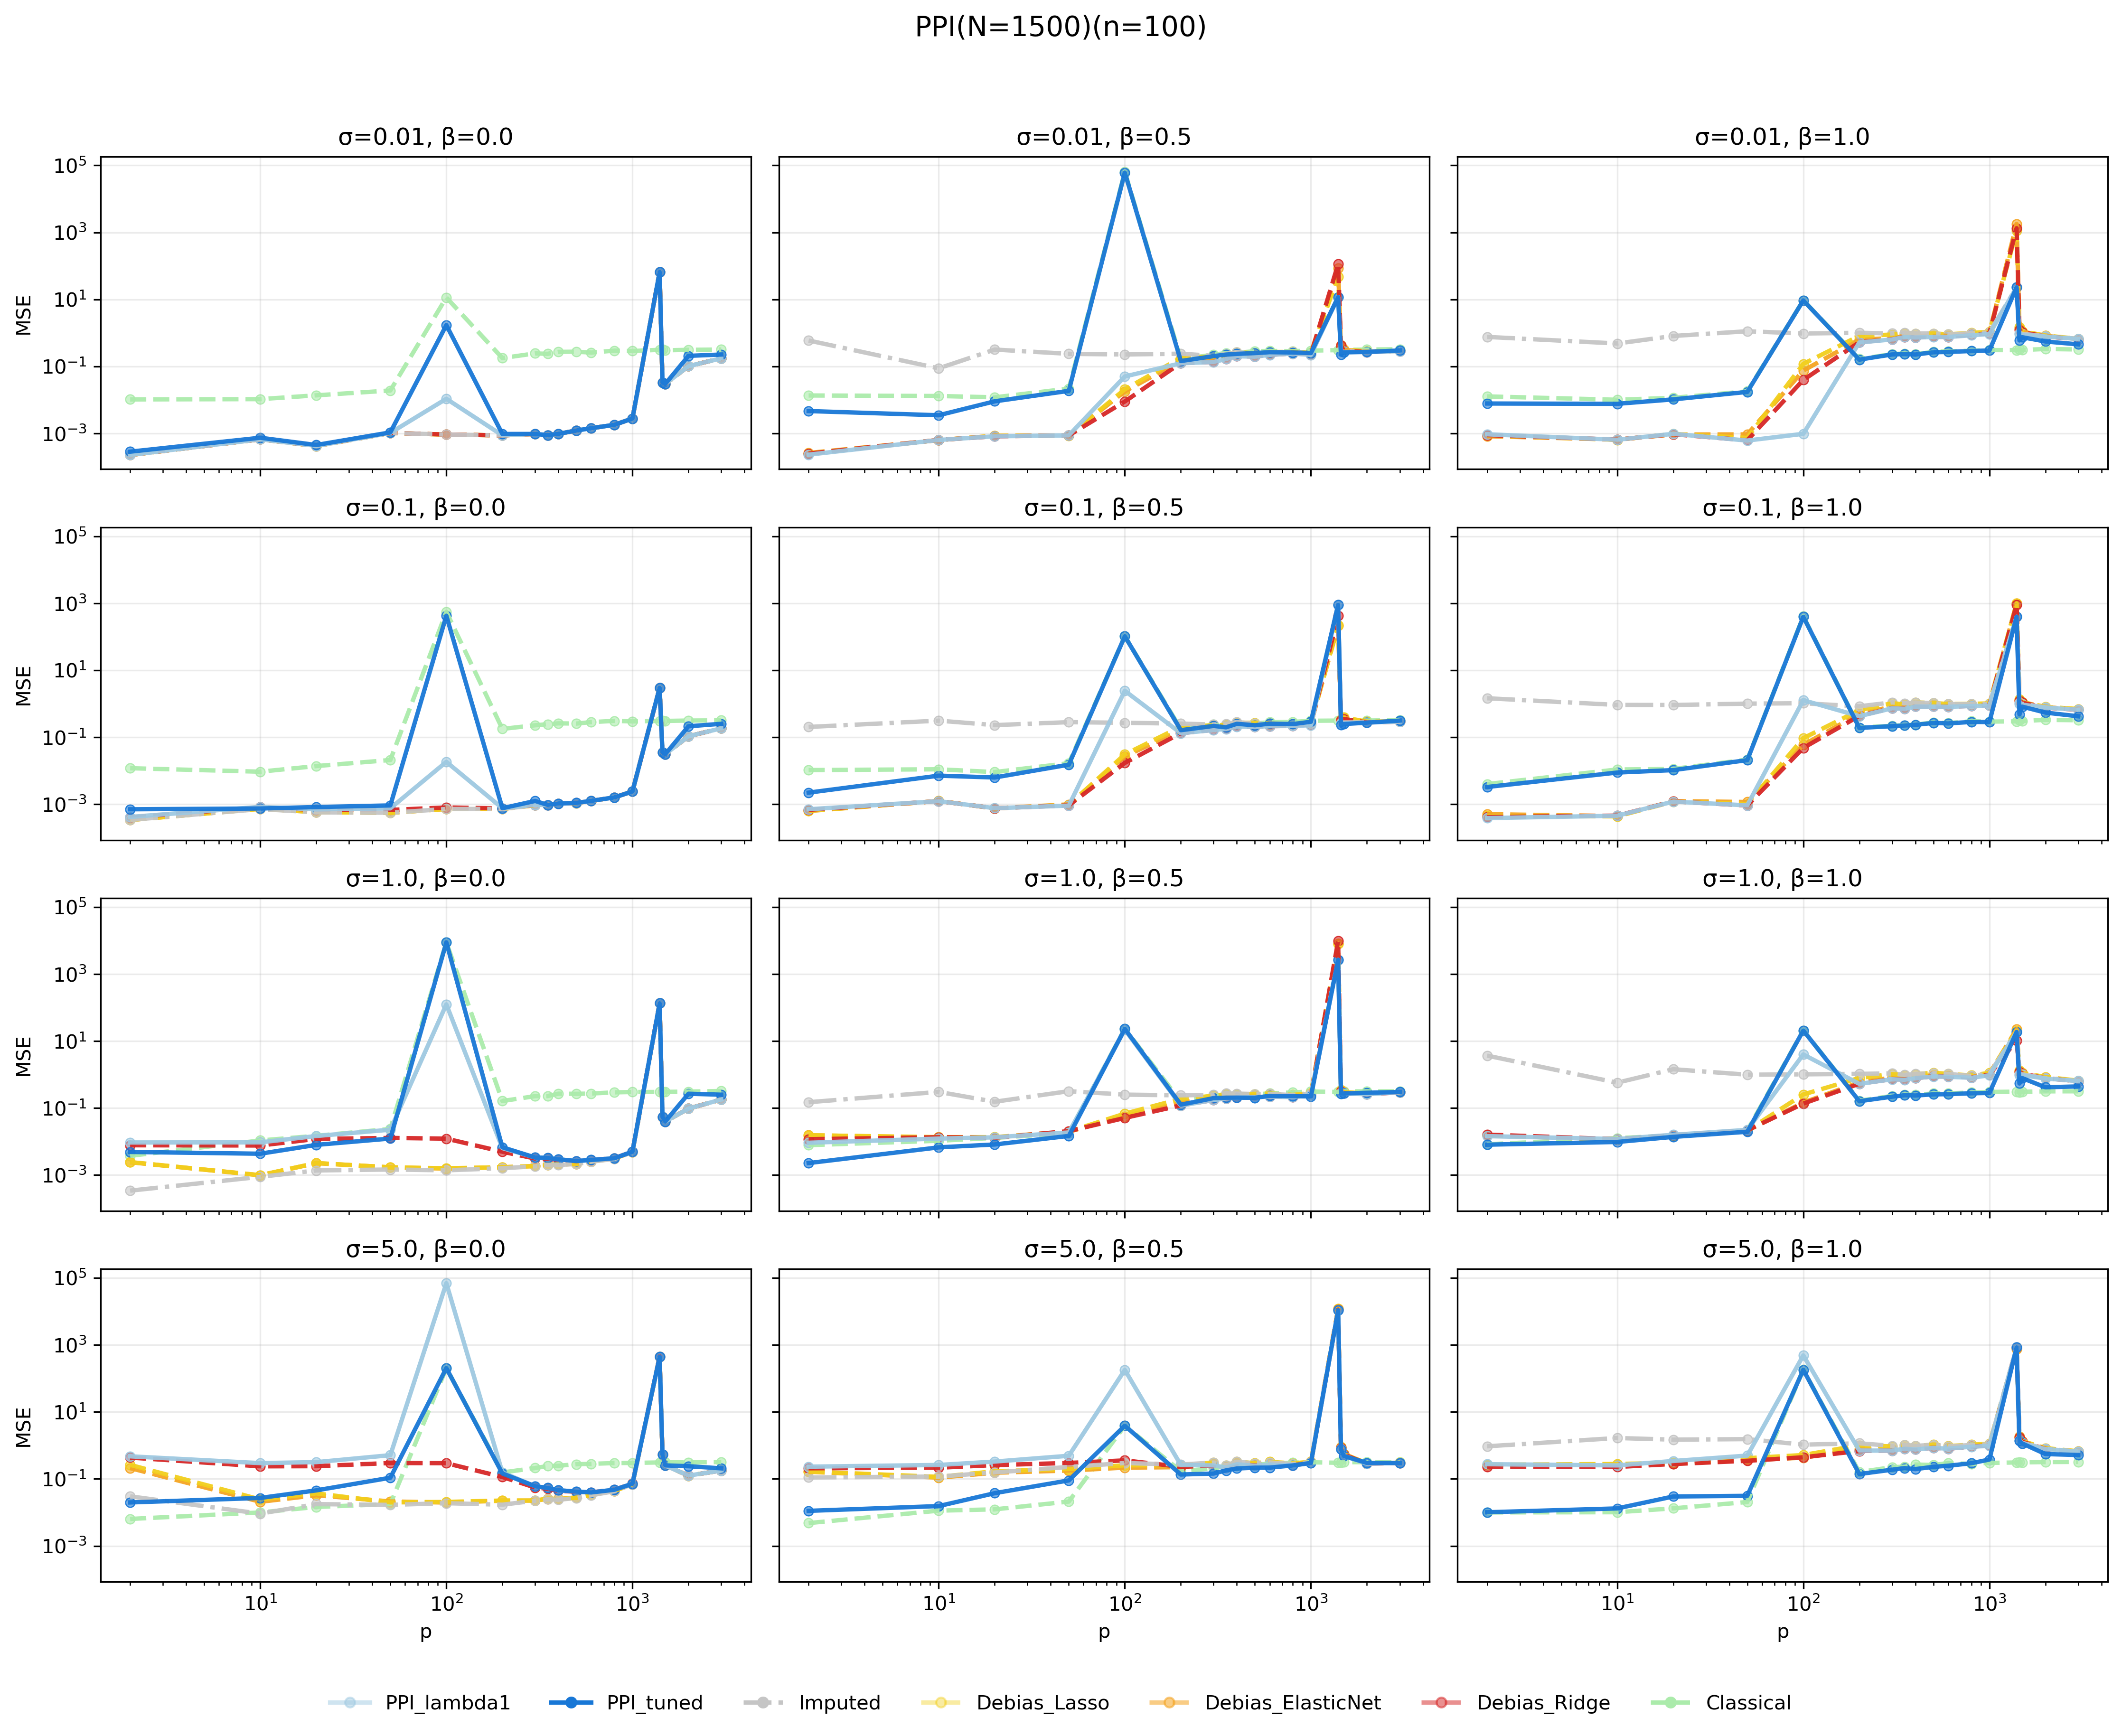

✅ output：figs_ppi\PPI(N=1500)(n=100).png


In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os

# ===== 配置 =====
title = "PPI(N=1500)"

METHODS_TO_SHOW = [
     "PPI_lambda1", "PPI_tuned", "Classical","Imputed","Debias_Lasso","Debias_ElasticNet","Debias_Ridge"
]

METHODS_TO_EXCLUDE = [
     
]

CSV_PATH = "results/all_results2.csv"
OUT_DIR  = "figs_ppi"
os.makedirs(OUT_DIR, exist_ok=True)

SIGMAS = [0.01, 0.1, 1.0, 5.0]        # 行
BETAS  = [0.0, 0.5, 1.0]              # 列

n_sel  = 100
use_log_x = True
use_log_y = True

# 透明度参数
LINE_ALPHA   = 0.95   # 线条透明度
MARKER_ALPHA = 0.60   # 标记点透明度
GRID_ALPHA   = 0.25   # 网格透明度

# ===== 读数据 =====
df = pd.read_csv(CSV_PATH)

if n_sel not in set(df["n"].unique()):
    n_sel = int(df["n"].mode().iat[0])
    print(f"[提示] 未找到指定 n；改用最常出现的 n={n_sel}")

must_cols = ["method","p","n","sigma","beta","error"]
df = df[must_cols].copy()
df["p"]     = pd.to_numeric(df["p"], errors="coerce")
df["error"] = pd.to_numeric(df["error"], errors="coerce")

df_n = df[df["n"] == n_sel].copy()

def summarize_block(block):
    m  = block["error"].mean()
    s  = block["error"].std(ddof=1)
    k  = len(block)
    se = (s / np.sqrt(k)) if k > 1 else np.nan
    ci = 1.96 * se if k > 1 else np.nan
    return pd.Series(dict(mse_mean=m, mse_se=se, ci95=ci, n_trials=k))

summary = []
for sig in SIGMAS:
    for bet in BETAS:
        sub = df_n[(df_n["sigma"] == sig) & (df_n["beta"] == bet)]
        if sub.empty:
            continue
        g = (sub.groupby(["beta","sigma","p","method"], as_index=False)
                 .apply(summarize_block)
                 .reset_index(drop=True))
        g["sigma"] = sig
        g["beta"]  = bet
        summary.append(g)

if len(summary) == 0:
    raise ValueError("没有任何 (sigma, beta) 组合的数据可以绘图。")

summary = pd.concat(summary, axis=0, ignore_index=True)

# 数据中出现的所有方法
all_methods = sorted(summary["method"].astype(str).unique())

# 计算最终要画的方法列表
methods_to_plot = [m for m in all_methods
                   if (not METHODS_TO_SHOW or m in METHODS_TO_SHOW)
                   and (m not in METHODS_TO_EXCLUDE)]
if not methods_to_plot:
    raise ValueError("METHODS_TO_SHOW/METHODS_TO_EXCLUDE 过滤后没有可绘制的方法。")

# ===== 固定颜色映射 =====
base_colors = {
    "PPI_lambda1":        "#9ec9e17c",   # 浅蓝
    "PPI_tuned":          "#1877D6FF",   # 深蓝
    "Imputed":            "#c5c5c5",
    "Debias_Lasso":       "#f2cf1d69",   # 黄
    "Debias_ElasticNet":  "#f5a5238e",   # 橘
    "Debias_Ridge":       "#d6272783",   # 红
    "Classical":          "#abebab",     # 绿
}
fallback_colors = ["#9467bd", "#8c564b", "#e377c2", "#17becf", "#1f77b4"]
for i, m in enumerate(all_methods):
    if m not in base_colors:
        base_colors[m] = fallback_colors[i % len(fallback_colors)]

# 带透明度的颜色（线/点可分别设置 alpha）
def rgba(color_hex, alpha):
    return mcolors.to_rgba(color_hex, alpha=alpha)

# 线型映射
linestyle_map = {
    "PPI_lambda1": "-",
    "PPI_tuned":   "-",
    "Imputed":     "-.",     # 点划线
    "Debias_Lasso":      "--",
    "Debias_ElasticNet": "--",
    "Debias_Ridge":      "--",
    "Classical":   "--",
}

# 图例顺序（再按筛选后的 methods_to_plot 过滤）
legend_order = [
    "PPI_lambda1", "PPI_tuned",
    "Imputed",
    "Debias_Lasso", "Debias_ElasticNet", "Debias_Ridge",
    "Classical",
] + [m for m in all_methods if m not in {
    "PPI_lambda1","PPI_tuned","Imputed",
    "Debias_Lasso","Debias_ElasticNet","Debias_Ridge","Classical"
}]
legend_methods = [m for m in legend_order if m in methods_to_plot]

# ===== 画 4×3 大图 =====
fig, axes = plt.subplots(
    nrows=len(SIGMAS), ncols=len(BETAS),
    figsize=(15, 12), dpi=300, sharex=True, sharey=True
)

if len(SIGMAS) == 1 and len(BETAS) == 1:
    axes = np.array([[axes]])
elif len(SIGMAS) == 1:
    axes = axes[np.newaxis, :]
elif len(BETAS) == 1:
    axes = axes[:, np.newaxis]

for i, sig in enumerate(SIGMAS):
    for j, bet in enumerate(BETAS):
        ax = axes[i, j]
        g = summary[(summary["sigma"] == sig) & (summary["beta"] == bet)]
        if g.empty:
            ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=11)
            ax.set_title(f"σ={sig}, β={bet}")
            ax.grid(True, alpha=GRID_ALPHA)
            continue

        for method in methods_to_plot:   # ← 只画筛选后的方法
            blk = g[g["method"].astype(str) == method].sort_values("p")
            if blk.empty:
                continue
            x = blk["p"].values
            y = blk["mse_mean"].values
            y_plot = np.maximum(y, 1e-16)

            base = base_colors[method]

            # 线
            ax.plot(
                x, y_plot,
                linewidth=2.2,
                color=rgba(base, LINE_ALPHA),
                linestyle=linestyle_map.get(method, '-'),
                label=str(method)
            )
            # 点
            ax.scatter(
                x, y_plot, s=22, linewidths=0.6,
                edgecolors=rgba(base, LINE_ALPHA),
                facecolors=rgba(base, MARKER_ALPHA)
            )

        ax.set_title(f"σ={sig}, β={bet}")
        ax.grid(True, alpha=GRID_ALPHA)

# 统一坐标轴与刻度
for ax in axes[-1, :]:
    ax.set_xlabel("p")
for ax in axes[:, 0]:
    ax.set_ylabel("MSE")

if use_log_x:
    for ax in axes.ravel():
        ax.set_xscale("log")
if use_log_y:
    for ax in axes.ravel():
        ax.set_yscale("log")

# 图例（只含筛选后的方法）
handles = [plt.Line2D([0],[0],
                      color=base_colors[m],
                      linestyle=linestyle_map.get(m, "-"),
                      marker="o", lw=2.2, label=m, markersize=5)
           for m in legend_methods]
if handles:
    fig.legend(handles=handles, loc="lower center", ncol=min(len(handles), 7),
               frameon=False, bbox_to_anchor=(0.5, -0.01))

fig.suptitle( title + f"(n={n_sel})", y=0.995, fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

outfile = os.path.join(OUT_DIR, title + f"(n={n_sel})"+".png")
plt.savefig(outfile, bbox_inches="tight")
plt.show()

print(f"✅ output：{outfile}")


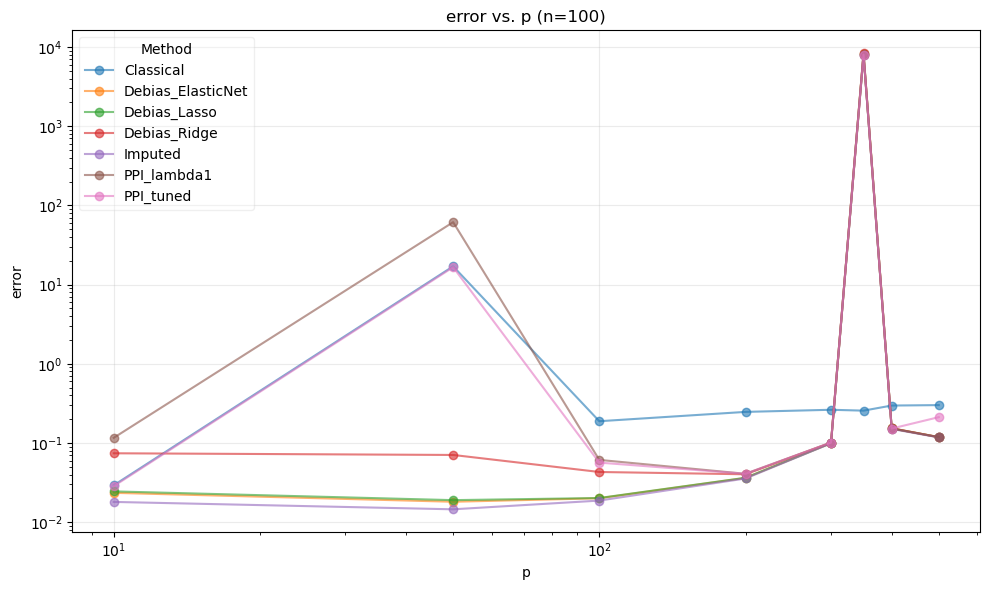

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("results/output.csv")
df = df[df["n"] == 50]
cat = "p"
note = "n=100" 
metric = "error"  

df_avg = df.groupby(["method", cat])[metric].mean().reset_index()

ALPHA_LINE   = 0.6  
ALPHA_GRID   = 0.25 
ALPHA_LEGEND = 0.3   

plt.figure(figsize=(10, 6))
for method in df_avg["method"].unique():
    subset = df_avg[df_avg["method"] == method]
    plt.plot(
        subset[cat], subset[metric],
        marker="o",
        label=method,
        alpha=ALPHA_LINE, 
    )

plt.title(f"{metric} vs. {cat} ({note})")
plt.xlabel(cat)
plt.ylabel(metric)
plt.yscale("log")
plt.xscale("log")
plt.grid(True, alpha=ALPHA_GRID)             # 网格也半透明
plt.legend(title="Method", framealpha=ALPHA_LEGEND)  # 图例背景半透明
plt.tight_layout()
plt.show()